In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


Preprocessing

In [33]:
df = pd.read_csv("customersegmentation.csv")
df.head()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,1500000,15,100000
1,2,750000,2,150000
2,3,15000,1,5000
3,4,225000,5,0
4,5,690000,7,8000


In [34]:
df.describe()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
count,10.00000,1.000000e+01,10.000000,10.000000
mean,5.50000,1.005267e+08,125.600000,60300.000000
std,3.02765,3.160430e+08,377.532692,69982.616889
min,1.00000,1.500000e+04,1.000000,0.000000
25%,3.25000,2.687500e+05,2.500000,5750.000000
50%,5.50000,5.950000e+05,6.000000,32500.000000
75%,7.75000,9.375000e+05,11.000000,93750.000000
max,10.00000,1.000000e+09,1200.000000,200000.000000


In [35]:
df.isna().sum()

Customer                       0
Total Amount                   0
Total Number of Transaction    0
Total Discount Amount          0
dtype: int64

In [36]:
df.head()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,1500000,15,100000
1,2,750000,2,150000
2,3,15000,1,5000
3,4,225000,5,0
4,5,690000,7,8000


In [37]:
x=df.iloc[:,[0,1,2]].values
x

array([[         1,    1500000,         15],
       [         2,     750000,          2],
       [         3,      15000,          1],
       [         4,     225000,          5],
       [         5,     690000,          7],
       [         6,     400000,          2],
       [         7,     187000,          8],
       [         8,     500000,         12],
       [         9,    1000000,          4],
       [        10, 1000000000,       1200]])

In [38]:
y = df.iloc[:,3].values
y

array([100000, 150000,   5000,      0,   8000,  25000,  40000,  75000,
       200000,      0])

In [39]:
d = preprocessing.normalize(df)
d

array([[6.65190105e-07, 9.97785158e-01, 9.97785158e-06, 6.65190105e-02],
       [2.61488180e-06, 9.80580676e-01, 2.61488180e-06, 1.96116135e-01],
       [1.89736656e-04, 9.48683279e-01, 6.32455519e-05, 3.16227760e-01],
       [1.77777778e-05, 1.00000000e+00, 2.22222222e-05, 0.00000000e+00],
       [7.24588981e-06, 9.99932794e-01, 1.01442457e-05, 1.15934237e-02],
       [1.49707887e-05, 9.98052578e-01, 4.99026289e-06, 6.23782861e-02],
       [3.66050915e-05, 9.77878874e-01, 4.18343903e-05, 2.09171952e-01],
       [1.58229816e-05, 9.88936352e-01, 2.37344725e-05, 1.48340453e-01],
       [8.82522608e-06, 9.80580676e-01, 3.92232270e-06, 1.96116135e-01],
       [1.00000000e-08, 1.00000000e+00, 1.20000000e-06, 0.00000000e+00]])

In [40]:
df[['Total Amount','Total Number of Transaction','Total Discount Amount']] = preprocessing.normalize(df[['Total Amount','Total Number of Transaction','Total Discount Amount']]);

In [41]:
df.head(10)

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,0.997785,0.000010,0.066519
1,2,0.980581,0.000003,0.196116
2,3,0.948683,0.000063,0.316228
3,4,1.000000,0.000022,0.000000
4,5,0.999933,0.000010,0.011593
5,6,0.998053,0.000005,0.062378
6,7,0.977879,0.000042,0.209172
7,8,0.988936,0.000024,0.148340
8,9,0.980581,0.000004,0.196116
9,10,1.000000,0.000001,0.000000


# **K-Means with 3 Centroid and 2 Iterations**

In [42]:
K = 3

centroids = df.loc[[0,2,7],:] 

In [43]:
print(centroids)

   Customer  Total Amount  Total Number of Transaction  Total Discount Amount
0         1      0.997785                     0.000010               0.066519
2         3      0.948683                     0.000063               0.316228
7         8      0.988936                     0.000024               0.148340


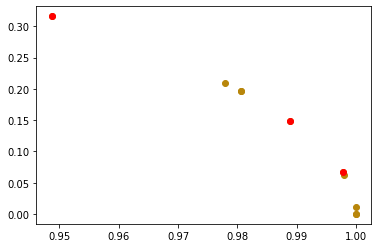

In [44]:
plt.scatter(df["Total Amount"],df["Total Discount Amount"],c='darkgoldenrod')
plt.scatter(centroids["Total Amount"],centroids["Total Discount Amount"],c='red')
plt.show()

   Customer  Cluster         1         2         3
0         1        1  0.000000  0.254491  0.082299
1         2        3  0.130734  0.124275  0.048501
2         3        2  0.254491  0.000000  0.172645
3         4        1  0.066556  0.320364  0.148752
4         5        1  0.054968  0.308915  0.137188
5         6        1  0.004149  0.258606  0.086444
6         7        3  0.144035  0.110965  0.061828
7         8        3  0.082299  0.172645  0.000000
8         9        3  0.130734  0.124275  0.048501
9        10        1  0.066556  0.320364  0.148752


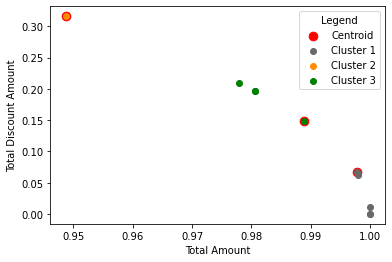

   Customer  Cluster         1         2         3
0         1        1  0.038445  0.254491  0.121944
1         2        3  0.169041  0.124275  0.008794
2         3        2  0.292517  0.000000  0.133030
3         4        1  0.028111  0.320364  0.188299
4         5        1  0.016523  0.308915  0.176755
5         6        1  0.034298  0.258606  0.126085
6         7        3  0.182319  0.110965  0.022122
7         8        3  0.120676  0.172645  0.039707
8         9        3  0.169041  0.124275  0.008794
9        10        1  0.028111  0.320364  0.188299


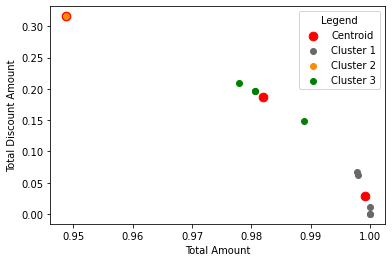

In [45]:
diff = 1
val=0

for y in range(0,2):
    XD=df
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Total Amount"]-row_d["Total Amount"])**2
            d2=(row_c["Total Number of Transaction"]-row_d["Total Number of Transaction"])**2
            d3=(row_c["Total Discount Amount"]-row_d["Total Discount Amount"])**2
            d=np.sqrt(d1+d2+d3)
            ED.append(d)
        df[i]=ED
        i=i+1
       
    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    print(df[['Customer','Cluster',1,2,3]])
    color=['dimgray','darkorange','green']
    clusters = ['Centroid','Cluster 1', 'Cluster 2', 'Cluster 3']
    plt.scatter(centroids["Total Amount"],centroids["Total Discount Amount"],c='red',s=75)
    for k in range(K):
      data=df[df["Cluster"]==k+1]
      plt.scatter(data["Total Amount"],data["Total Discount Amount"],c=color[k])
    plt.xlabel('Total Amount')
    plt.ylabel('Total Discount Amount')
    plt.legend(labels=clusters,
           title="Legend")
    plt.show()
   
    
    centroids_new = df.groupby(["Cluster"]).mean()[["Total Amount","Total Number of Transaction","Total Discount Amount"]]
    centroids = df.groupby(["Cluster"]).mean()[["Total Discount Amount","Total Number of Transaction","Total Amount"]]
     

In [46]:
df.head(10)

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount,1,2,3,Cluster
0,1,0.997785,0.000010,0.066519,0.038445,0.254491,0.121944,1
1,2,0.980581,0.000003,0.196116,0.169041,0.124275,0.008794,3
2,3,0.948683,0.000063,0.316228,0.292517,0.000000,0.133030,2
3,4,1.000000,0.000022,0.000000,0.028111,0.320364,0.188299,1
4,5,0.999933,0.000010,0.011593,0.016523,0.308915,0.176755,1
5,6,0.998053,0.000005,0.062378,0.034298,0.258606,0.126085,1
6,7,0.977879,0.000042,0.209172,0.182319,0.110965,0.022122,3
7,8,0.988936,0.000024,0.148340,0.120676,0.172645,0.039707,3
8,9,0.980581,0.000004,0.196116,0.169041,0.124275,0.008794,3
9,10,1.000000,0.000001,0.000000,0.028111,0.320364,0.188299,1
